# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

Heart failure is a common event caused by CVDs and this [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) contains 12 features that can be used to predict mortality by heart failure.

In this notebook we will analyze data and try to build the accurate model to predict death  based on patient health description.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data is clean and has no non-null values. There are 12 numeric features and 299 rows. 

## Data Analysis

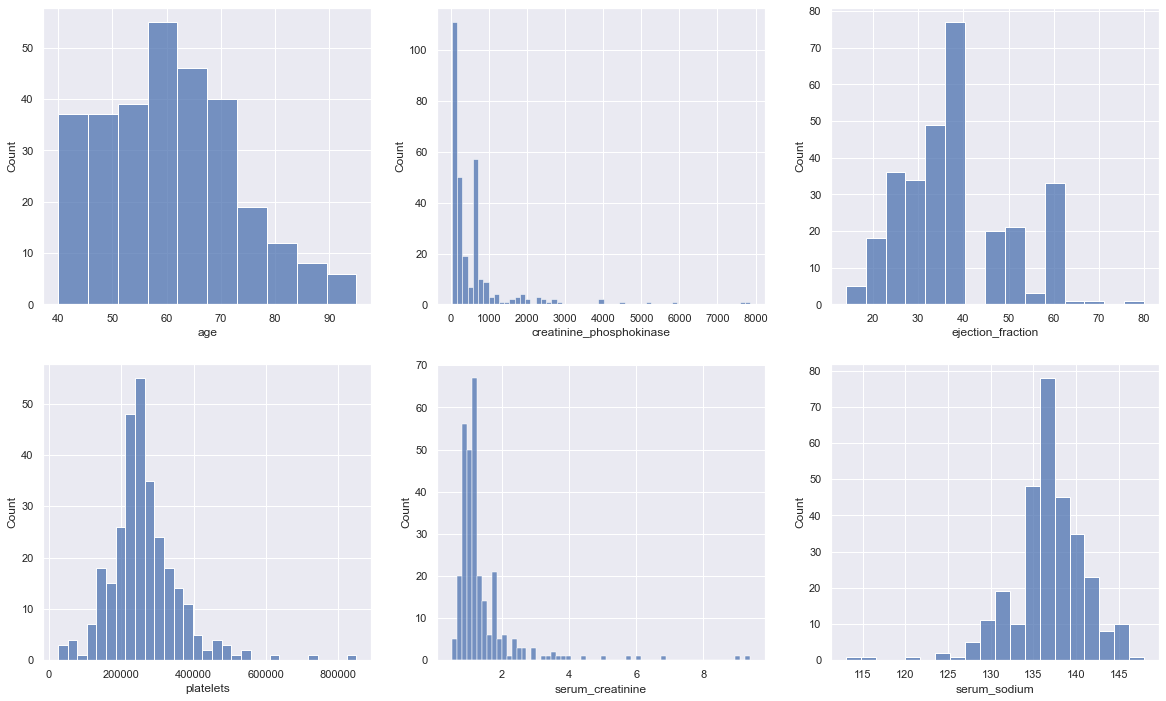

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.83,11.89,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.84,970.29,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.08,11.83,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.03,97804.24,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.39,1.03,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.63,4.41,113.0,134.0,137.0,140.0,148.0


In [22]:
fig = plt.figure(figsize=(20,12))
continuous_columns = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
numeric_info = pd.DataFrame()
for i, column in enumerate(continuous_columns):
    ax = fig.add_subplot(2,3, i+1)
    sns.histplot(data[column], ax=ax)
    numeric_info=pd.concat([numeric_info, (round(pd.DataFrame(data[column].describe()).T, 2))])
plt.show()
numeric_info

All the continious columns are normally distributed except creatinine_phosphokinase and ejection_fraction. These two columns have some outliers, too.

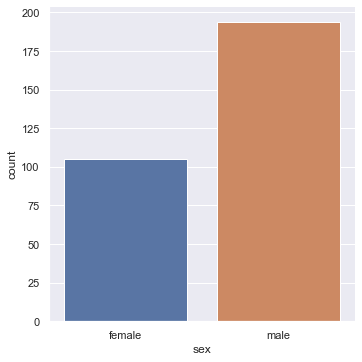

In [5]:
sns.catplot(x="sex", data=data, kind="count", label=["male", "female"])
plt.xticks([0, 1],["female", "male"])
plt.show()

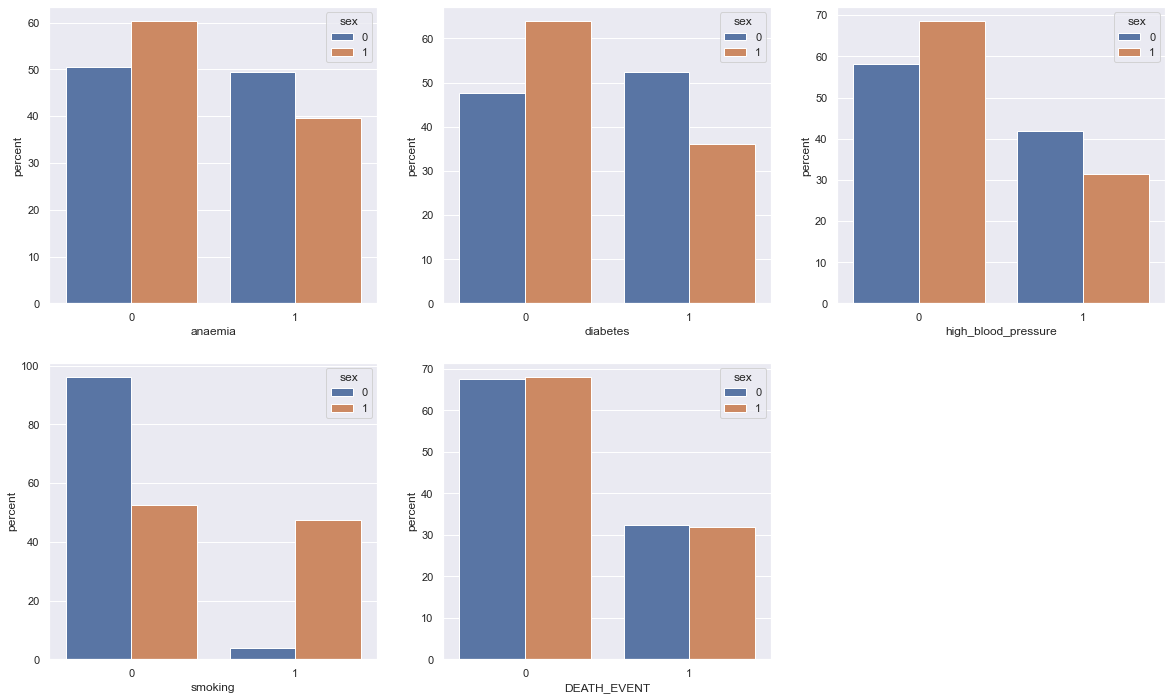

In [7]:
fig = plt.figure(figsize=(20,12))
categorical_columns = ["anaemia", "diabetes", "high_blood_pressure", "smoking", "DEATH_EVENT"]
sex_counts = np.array(data["sex"].value_counts().sort_index().append(data["sex"].value_counts().sort_index()))
for i, column in enumerate(categorical_columns):
    ax = fig.add_subplot(2,3, i+1)
    
    series = pd.Series(sex_counts, index = data.groupby(column)["sex"].value_counts().sort_index().index)
    (data
    .groupby(column)["sex"]
    .value_counts()
    .div(series)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.barplot,'data'), x=column,y='percent',hue="sex", ax=ax))

Data has more male patiences information that female. Many smokers are among men. Women are more likely to have diabetes, high blood pressure and anaemia than men. Heart related deaths are equally distributed among males and females.

## Feature Engineering